## Descriptive Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,zpid,city,state,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
0,3.605544e+08,Bronx,NY,10460.0,0.0,1.0,750.0,0.016,33.2,0.269,24.9,44604.3,31504.0,141.0,2550.0
1,2.115158e+09,Bronx,NY,10468.0,1.0,1.0,750.0,0.013,34.4,0.331,63.7,66519.9,40138.0,141.0,2550.0
2,3.596626e+08,Bronx,NY,10461.0,1.0,1.0,750.0,0.023,33.9,0.432,13.9,21850.8,61087.0,141.0,2584.0
3,2.085204e+09,Bronx,NY,10457.0,0.0,1.0,750.0,0.020,32.5,0.284,14.1,66913.8,38066.0,141.0,2550.0
4,2.978893e+07,Bronx,NY,10467.0,2.0,1.0,900.0,0.025,37.2,0.351,64.3,42589.3,42639.0,141.0,2550.0


In [4]:
df.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,7.314000e+03,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000
mean,1.323094e+09,10698.116489,1.686355,1.178357,871.991797,0.026567,38.471411,0.377768,42.574528,57670.531105,86453.471014,176.605031,3225.354936
std,8.970547e+08,580.396766,0.948453,0.368877,109.275300,0.014160,6.191669,0.099476,16.669612,33716.492368,36271.111875,22.403999,580.993558
min,2.977812e+07,10001.000000,0.000000,1.000000,750.000000,0.000000,26.200000,0.000000,13.600000,1261.200000,21846.000000,141.000000,2550.000000
25%,3.523039e+08,10028.000000,1.000000,1.000000,750.000000,0.015000,35.000000,0.297000,30.400000,31902.900000,58850.000000,157.900000,2550.000000
50%,2.060692e+09,10472.000000,2.000000,1.000000,900.000000,0.026000,37.700000,0.365000,42.500000,53801.600000,77551.000000,172.500000,3150.000000
75%,2.095869e+09,11225.000000,2.000000,1.000000,1000.000000,0.035000,40.700000,0.461000,60.400000,76855.100000,114427.000000,204.100000,3993.750000
max,2.146837e+09,11697.000000,3.000000,2.000000,1000.000000,0.078000,86.000000,0.655000,68.400000,146955.300000,250001.000000,204.100000,3994.000000


In [7]:
df['city'].value_counts()

city
New York                2567
Brooklyn                2192
Bronx                    868
Astoria                  266
Staten Island            260
Flushing                 177
Jamaica                  128
Ridgewood                100
Long Island City          73
Far Rockaway              62
Forest Hills              41
Oakland Gardens           40
Fresh Meadows             38
Woodside                  33
Bayside                   32
East Elmhurst             26
Middle Village            25
Ozone Park                24
Rego Park                 23
Queens Village            21
Rockaway Park             20
Arverne                   19
Maspeth                   18
Sunnyside                 17
Elmhurst                  15
Woodhaven                 14
Jackson Heights           14
Richmond Hill             14
Whitestone                13
Kew Gardens               13
Saint Albans              13
Howard Beach              13
Manhattan                 13
Corona                    12
College P

## Data Visualization

### Distribution and Skewness

In [10]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

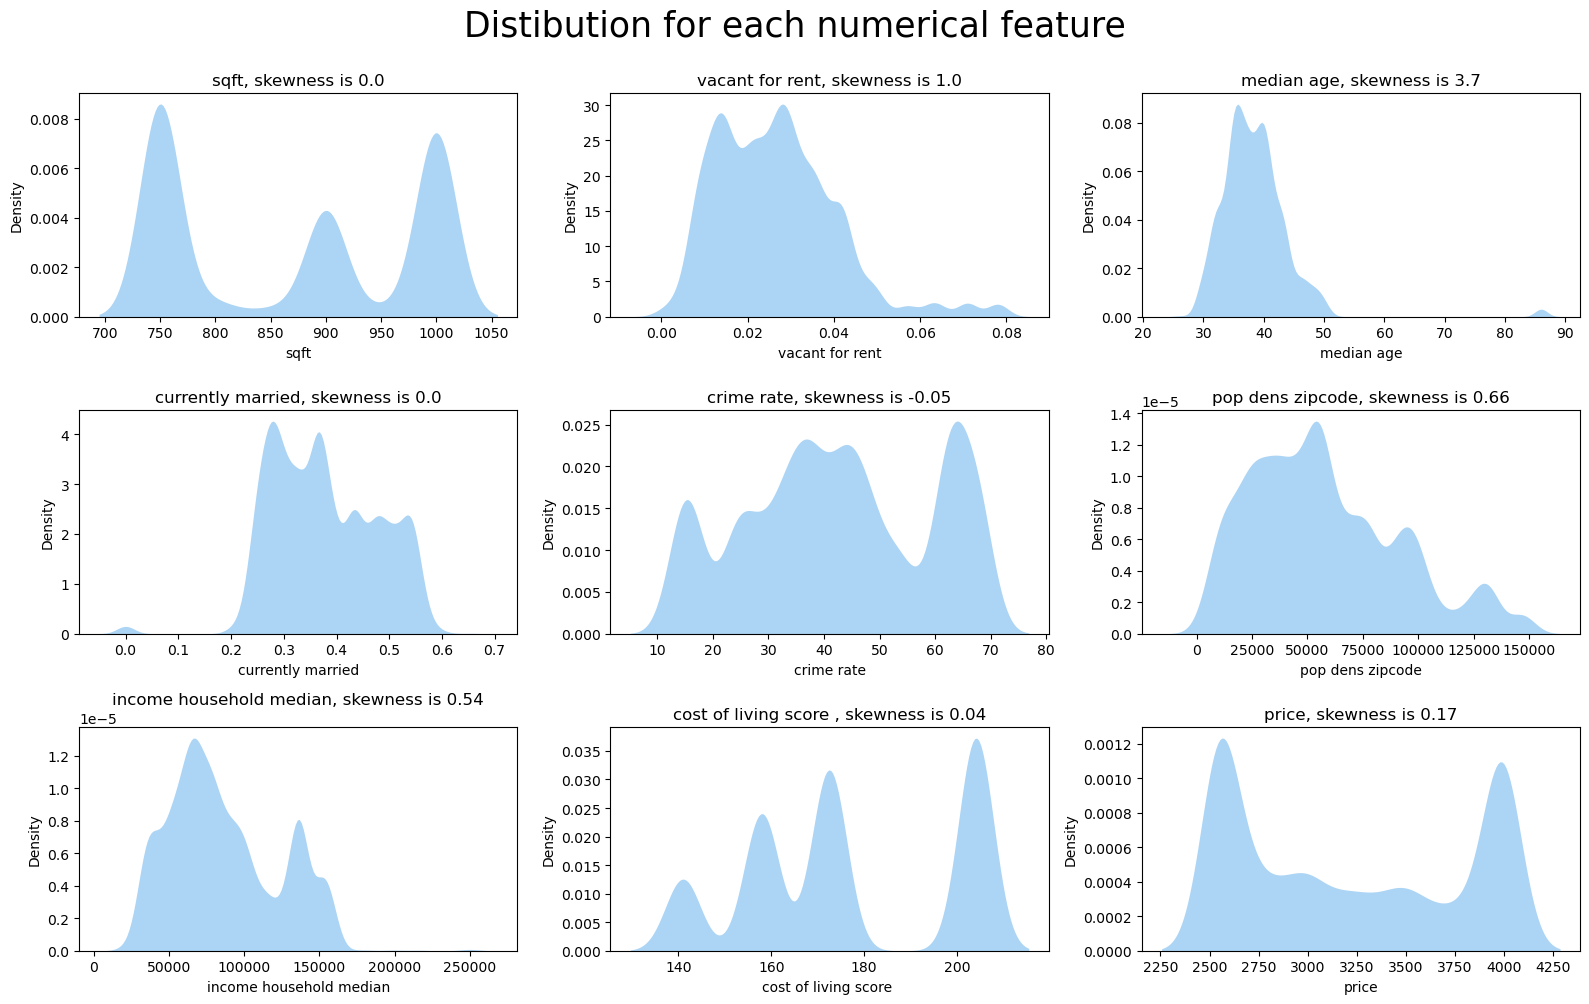

In [19]:
columns = list(df.columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categoric_columns = [col for col in columns if col not in numeric_columns]

items_to_remove = ['bedrooms', 'bathrooms', 'zpid', 'zipcode']
filtered_numeric_columns = [item for item in numeric_columns if item not in items_to_remove]


# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(16,10))
    fig.suptitle(suptitle,y=1, size=25)  # add a centered title to the figure
    axs = axs.flatten() # convert the multi-dimensional array of Axes objects into a one-dimensional array
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#98CAF2')  # plot a kernel density estimate (KDE)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2))) # skipna = True means that missing values are ignored in the calculation
        
dist_custom(dataset=df, columns_list=filtered_numeric_columns, rows=3, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout() # automatically adjust subplot parameters so that the subplots fit into the figure area nicely.

#### Key Findings

- Most Common Age Group: The median age distribution is heavily right-skewed, indicating a younger population in the dataset, predominantly around 30-40 years old.
- Distribution Characteristics: Many variables, such as sqft (square footage), price, and median age, are not normally distributed, showing significant skewness and kurtosis.
- Population density shows a mild right skew, implying that most zip codes are less densely populated with some areas significantly more crowded. This could impact real estate pricing and rental market dynamics.

### Checking for outliers - Inter Quartile Range (IQR)

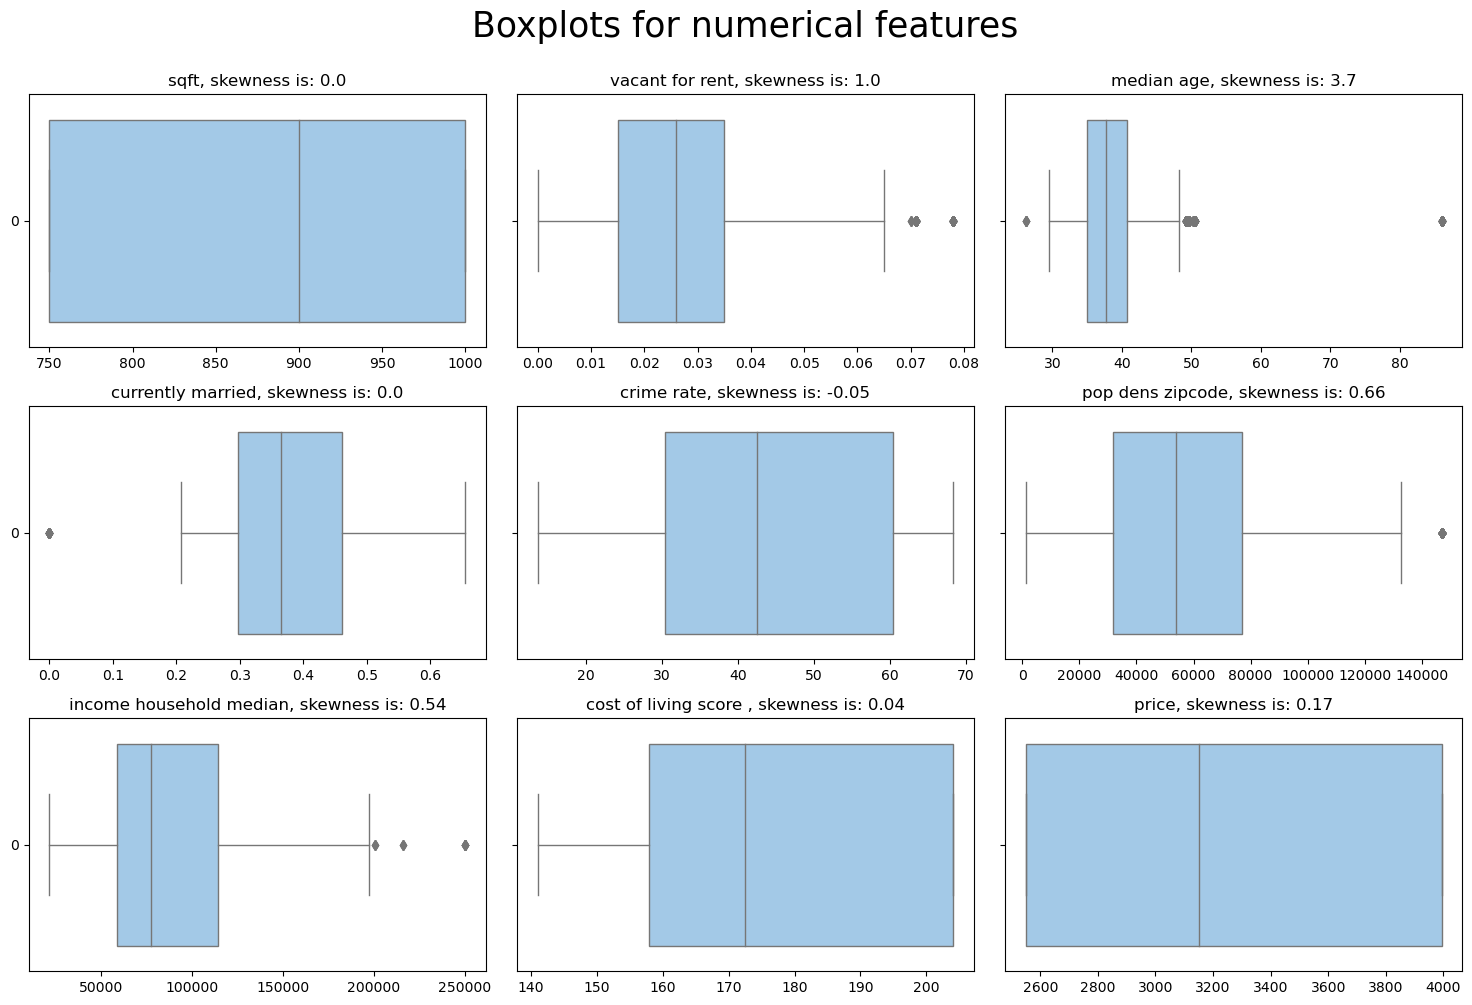

In [22]:
# Defining the colors for the plots
palette = ['#98CAF2', '#EC8DA3','#3A4EA7', '#BB5B6A']

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,10))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette, linewidth=1)
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=filtered_numeric_columns, rows=3, cols=3, suptitle='Boxplots for numerical features')
plt.tight_layout()

#### Key Findings

- Median Age Outliers: The median age has a significant right skew, with most of the distribution concentrated around younger ages but extending far into older ages. This indicates a few areas with notably older populations which may influence local market preferences and needs.
- Vacancy Rates: The vacancy rate for rentals shows a concentration of values near zero with some outliers, suggesting that most properties have low vacancy rates but a few areas or properties might struggle with higher vacancies.
- Crime Rate: The distribution of crime rates is relatively uniform with a slight left skew, suggesting most areas have moderate crime rates with few areas of extremely low crime, potentially appealing for safety-focused marketing.
- Income and Cost of Living: Both income household median and cost of living score have moderate spreads without extreme outliers, indicating a stable economic environment across the dataset. However, a slight skew in household income suggests that while most regions have moderate income levels, there are pockets of higher income.

### Correlation Matrices and Heatmaps

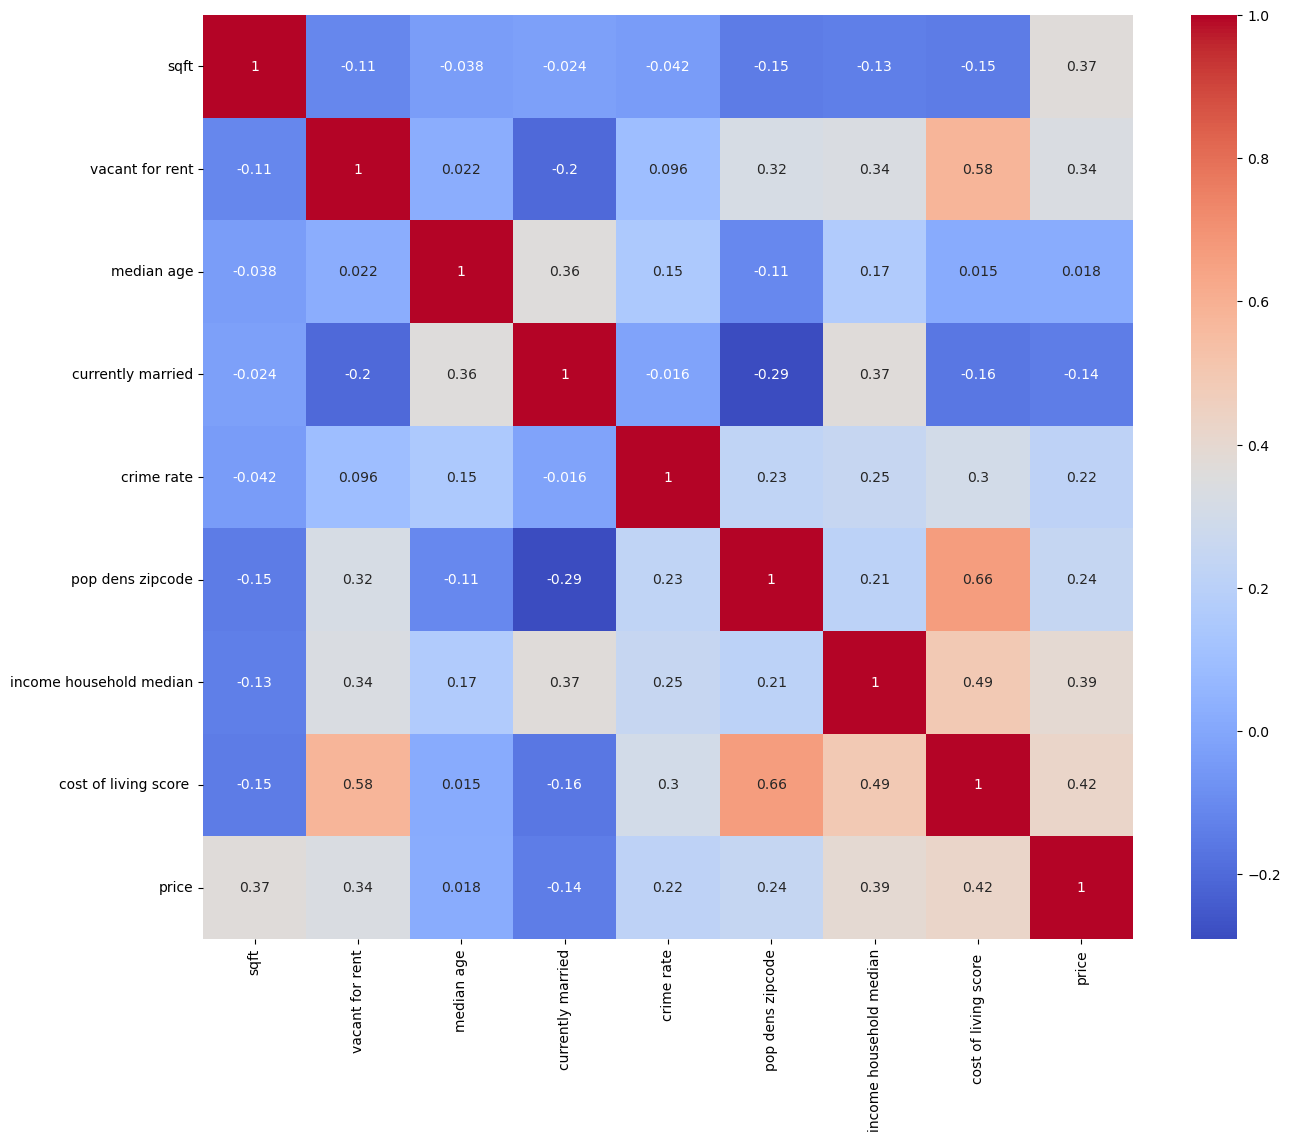

In [26]:
# Calculate the pairwise Pearson correlation of numerical variables
correlation_matrix = df[filtered_numeric_columns].corr(method='pearson')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Key Findings

- There is a very strong positive correlation (0.42) between the cost of living score and price. This suggests that areas with a higher cost of living also have significantly higher property prices, which is typical in urban or economically developed areas.
- A moderate positive correlation (0.32) is observed between population density and the rate of vacancies. This might indicate that denser areas have higher turnover rates in rentals, possibly due to a more transient population.
- The median household income has a substantial positive correlation (0.39) with price, confirming that wealthier areas tend to have higher property prices.